Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [29]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [4]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

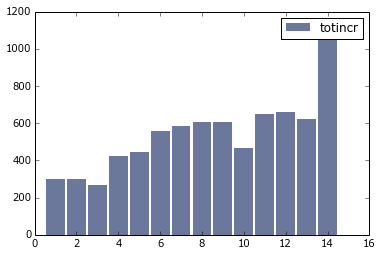

In [5]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

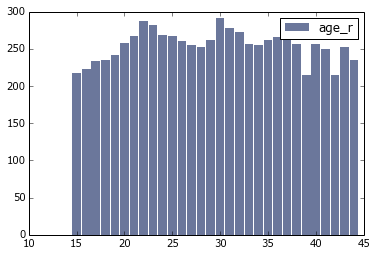

In [6]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

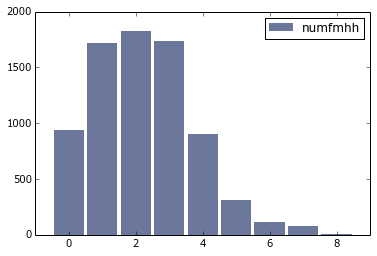

In [7]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

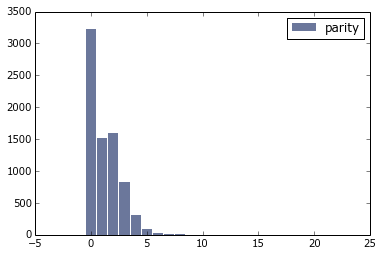

In [44]:
parity = thinkstats2.Hist(resp.parity)
thinkplot.Hist(parity, label='parity')
thinkplot.Show()

This distribution is mostly gaussian, but with one tail instead of two (can't have negative kids).  The mode is 0.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [45]:
parity.Largest()

[(22, 1),
 (16, 1),
 (10, 3),
 (9, 2),
 (8, 8),
 (7, 15),
 (6, 29),
 (5, 95),
 (4, 309),
 (3, 828)]

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

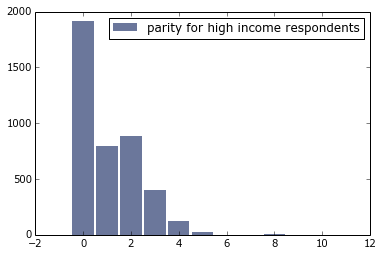

In [38]:
richparity = thinkstats2.Hist(resp.parity[resp.totincr > 8])
thinkplot.Hist(richparity, label='parity for high income respondents')
thinkplot.Show()

Find the largest parities for high income respondents.

In [39]:
richparity.Largest()

[(10, 1),
 (8, 4),
 (7, 2),
 (6, 2),
 (5, 27),
 (4, 122),
 (3, 405),
 (2, 886),
 (1, 798),
 (0, 1916)]

Compare the mean <tt>parity</tt> for high income respondents and others.

In [47]:
print 'high income mean parity:',resp.parity[resp.totincr > 8].mean()
print '   everyone mean parity:',resp.parity.mean()

high income mean parity: 1.07518616382
   everyone mean parity: 1.22321078111


Investigate any other variables that look interesting.

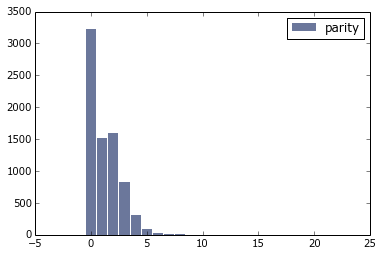

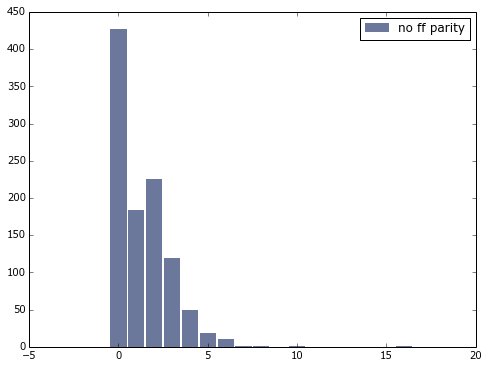

   No FF mean parity: 1.33526011561
everyone mean parity: 1.22321078111


In [61]:
# Seeing the difference in parity between all respondents and those living with no father figure at age 14
noffparity = thinkstats2.Hist(resp.parity[resp.lvsit14m == 3])
parity = thinkstats2.Hist(resp.parity)
thinkplot.Hist(parity, label='parity')
thinkplot.Show()
thinkplot.Hist(noffparity, label='no ff parity')
thinkplot.Show()

# Difference in parity mean:
print '   No FF mean parity:',resp.parity[resp.lvsit14m == 3].mean()
print 'everyone mean parity:',resp.parity.mean()

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

In [65]:
import nsfg
df = nsfg.ReadFemPreg()

In [70]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]

print 'firsts mean weight:',firsts.totalwgt_lb.mean()
print 'others mean weight:',others.totalwgt_lb.mean()

import math

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

CohenEffectSize(firsts.totalwgt_lb,others.totalwgt_lb)

firsts mean weight: 7.20109443044
others mean weight: 7.32585561497


-0.088672927072601743

First babies are lighter than others by about 0.12 lbs on average.  Cohen's d is about 0.089, which is still small but is larger than that of the difference in pregnancy length.